似然和概率
https://fangs.in/post/thinkstats/likelihood/
概率是正向的，我知道所有条件，去预测结果出现的可能性
似然是反向的，我知道结果，去反推我的条件
在机器学习中，我们一般是有样本（相当于结果），要去求我的参数（相当于条件）

就是所有样本似然最大的时候，也就是我这个参数最有可能的时候。我们需要根据已知时间来找出产生这种结果最有可能的条件
那么为什么要最大呢？
https://www.zhihu.com/question/266629768 这个讲的非常明白

现在有一种衡量两种概率分布之间差距的方法就做KL散度 https://zhuanlan.zhihu.com/p/458745814 https://blog.csdn.net/dongtuoc/article/details/134367944

## softmax回归

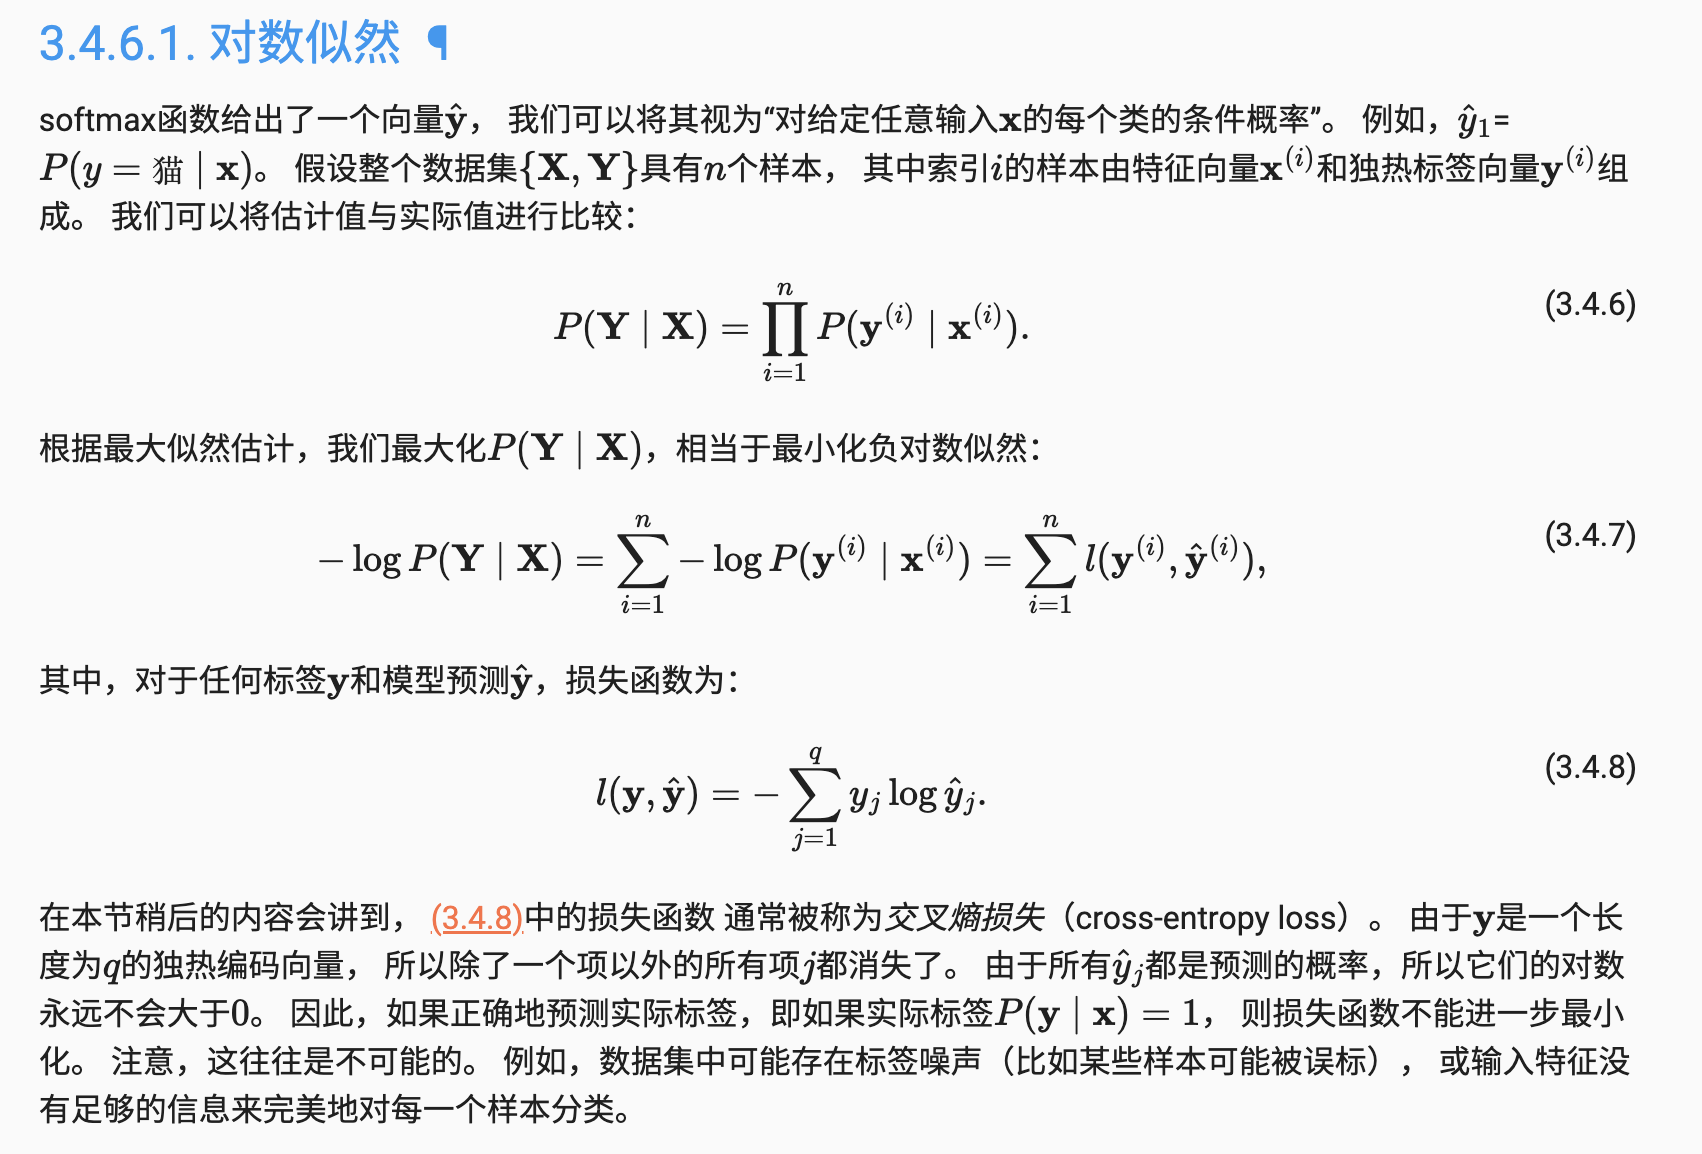

# 图像分类数据集

MNIST 

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

/Users/xujian/miniconda3/envs/dev_torch3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
trans = transforms.ToTensor()

In [3]:
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True,transform=trans,
                                               download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False,transform=trans,
                                               download=True)
len(mnist_train), len(mnist_test)

100.0%

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


111.0%

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw


100.0%

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


159.1%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...
Done!


(60000, 10000)

In [5]:
mnist_train[0][0].shape # 第一列表示存储图片信息，第二列是存储的标号 # 黑白图片，rgb=1

torch.Size([1, 28, 28])

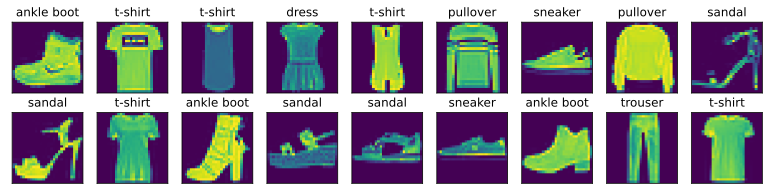

In [6]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [13]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [14]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.78 sec'

## softmax从零实现

In [45]:
import torch

In [46]:
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [73]:
for X, y in test_iter:
    print(X.shape)
    print(y.shape)

torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([256, 1, 28, 28])
torch.Size([256])
torch.Size([2

In [47]:
num_inputs = 784
num_outputs = 10

In [48]:
W = torch.normal(0, 0.01, size=(num_inputs,num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [49]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [50]:
def softmax(X):
    X_exp=torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp/partition  # 这里应用了广播机制

In [51]:
X =  torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob, X_prob.sum() # 每一行一个样本，没一列最大的那个概率为类别

(tensor([[0.2863, 0.3191, 0.2115, 0.1257, 0.0574],
         [0.3504, 0.0118, 0.5296, 0.0375, 0.0707]]),
 tensor(2.))

In [52]:
X_prob.sum(1, keepdim=True) # 行的和为100%

tensor([[1.0000],
        [1.0000]])

In [83]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [84]:
y =torch.tensor([0,2])

In [85]:
y_hat = torch.tensor([[0.1,0.3,0.6], [0.3, 0.2,0.5]])
y_hat[[0, 1], y] # 创建一个数据y_hat，其中包含2个样本在3个类别的预测概率，使用y作为y_hat中概率的缩影

tensor([0.1000, 0.5000])

In [86]:
# 实现交叉熵损失函数
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y]) # one hot编码，妙啊！
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [87]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape)>1 and y_hat.shape[1]>1: # 判断是否为二维矩阵
        y_hat = y_hat.argmax(axis=1) # argmax()函数的作用是返回输入张量中指定维度上的最大值的索引。
    cmp = y_hat.type(y.dtype) == y  # 可能类型不一样，先转类型，再生成布尔
    return float(cmp.type(y.dtype).sum())
accuracy(y_hat, y)/len(y)


0.5

In [88]:
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module): # 类别为nn.module
        net.eval() # 将模型设置为评估模式,不需要计算梯度了
    metric = Accumulator(2) # 当metric = Accumulator(2)时，创建了一个Accumulator对象，用于跟踪两个值，通常用于计算模型评估指标
    for X, y in data_iter:
        metric.add(accuracy(net(X),y),y.numel())
    return metric[0]/metric[1]

In [89]:
class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

In [90]:
evaluate_accuracy(net, test_iter)

0.1023

In [91]:
lr = 0.1

def updater(batch_size): #sgd
    return d2l.sgd([W, b], lr, batch_size)

In [92]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y) # cross_entropy
        # 使用定制的优化器和损失函数
        l.sum().backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [93]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [94]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

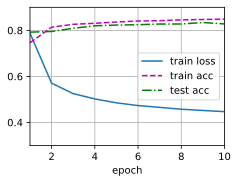

In [95]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)